# Processing wav file

<img src="http://hydrogen.physik.uni-wuppertal.de/hyperphysics/hyperphysics/hbase/music/imgmus/fantvowred.gif"/>

In [1]:
import soundfile as sf
import matplotlib.pyplot as plt
%matplotlib notebook

import numpy as np
from lib.plotmd import plotVector,plot2D
from lib.signalprocessingmd import fourierTransform,getScaledDomain
from lib.filtersmd import *

In [2]:
def plotHelper(xn,Xn,fn,Fn,yn,Yn,dt,filter_name):
    fscaled1=getScaledDomain(dt=dt,N=xn.shape[0])[:Xn.shape[0]]
    fscaled2=getScaledDomain(dt=dt,N=fn.shape[0])[:Fn.shape[0]]
    fscaled3=getScaledDomain(dt=dt,N=yn.shape[0])[:Yn.shape[0]]
    
    plt.figure(figsize=(12, 12), dpi=80)
    plt.subplot(321)
    plotVector(xn,"time domain ","n","f(n)")
    plt.subplot(322)
    plot2D(fscaled1,Xn,"frequency domain","n","F(n)")
    plt.subplot(323)
    plotVector(fn,filter_name+" | time domain ","n","f(n)")
    plt.subplot(324)
    plot2D(fscaled2,Fn,filter_name+" | frequency domain","n","F(n)")
    plt.subplot(325)
    plotVector(yn,"time domain ","n","f(n)")
    plt.subplot(326)
    plot2D(fscaled3,Yn,"frequency domain","n","F(n)")
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


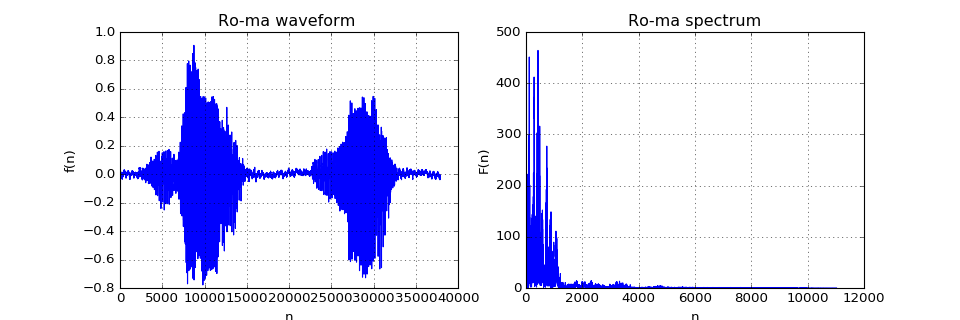

In [3]:
data, fs = sf.read('data/roma.wav')
N=data.shape[0]
dt=1.0/fs
fscaled=getScaledDomain(dt,N)[:N/2]

_,Cn=fourierTransform(data)
Cn=Cn[:N/2]
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plotVector(data,"Ro-ma waveform ","n",'f(n)')
plt.subplot(1,2,2)
plot2D(fscaled,Cn,"Ro-ma spectrum","n",'F(n)')
plt.show()

<IPython.core.display.Javascript object>


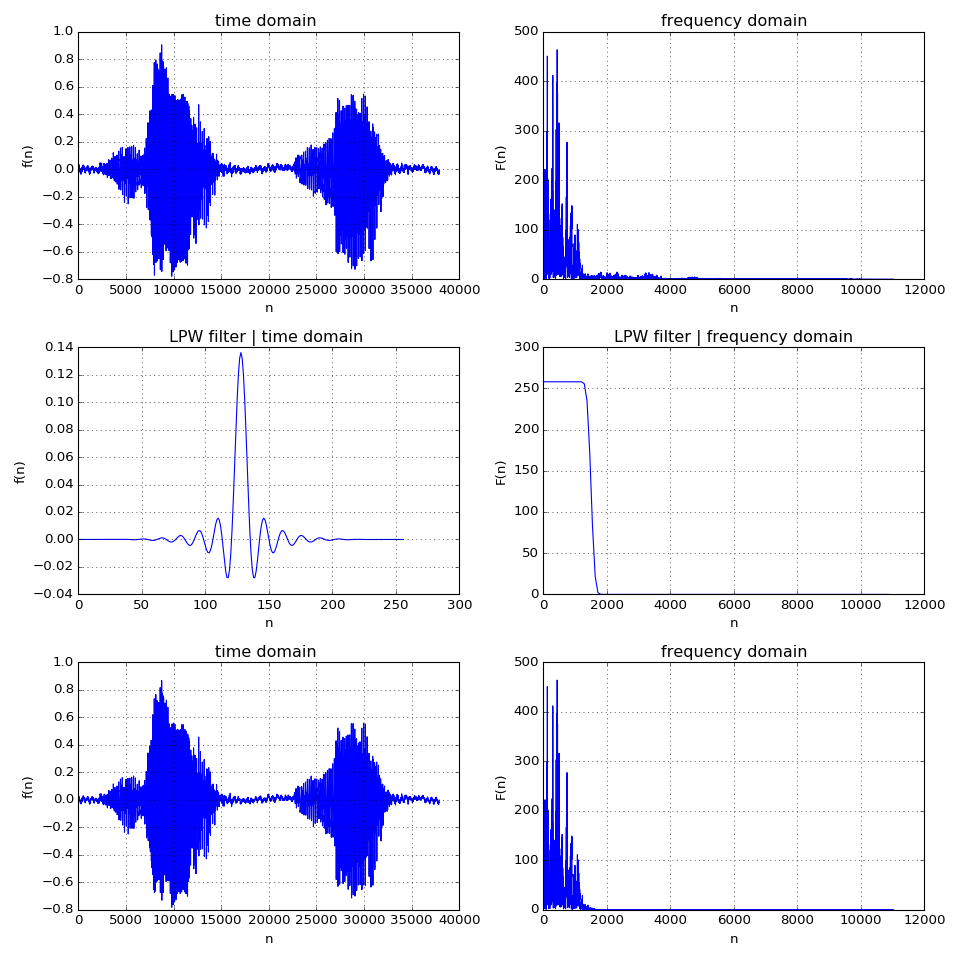

In [4]:
fout=1500
m=128
NF=2*m+1
NS=data.shape[0]
lpw=lpf(fout,m,dt)
_,Cn_lpw=fourierTransform(lpw)
Cn_lpw=Cn_lpw[:NF/2]*(NF+1)

yn_lpw=np.convolve(data,lpw)[m:-m]

_,Yn_lpw=fourierTransform(yn_lpw)
Yn_lpw=Yn_lpw[:NS/2]
plotHelper(data,Cn,lpw,Cn_lpw,yn_lpw,Yn_lpw,dt,"LPW filter")

sf.write('output/lpw_roma.wav',yn_lpw , fs)

<IPython.core.display.Javascript object>


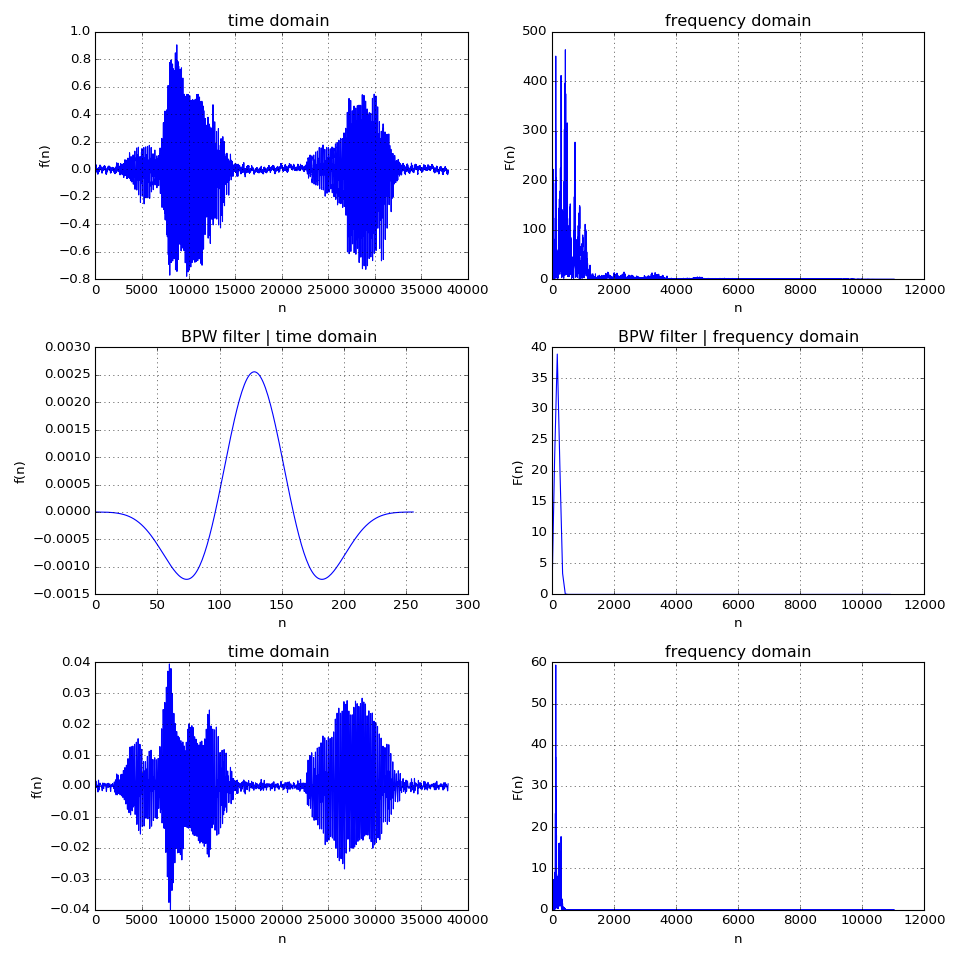

In [5]:
fc1=80
fc2=140
bpw=bpf(fc1,fc2,m,dt)
_,Cn_bpw=fourierTransform(bpw)
Cn_bpw=Cn_bpw[:NF/2]*(NF+1)

yn_bpw=np.convolve(data,bpw)[m:-m]
_,Yn_bpw=fourierTransform(yn_bpw)
Yn_bpw=Yn_bpw[:NS/2]
plotHelper(data,Cn,bpw,Cn_bpw,yn_bpw,Yn_bpw,dt,"BPW filter")

sf.write('output/bpw_roma0.wav',yn_bpw , fs)

<IPython.core.display.Javascript object>


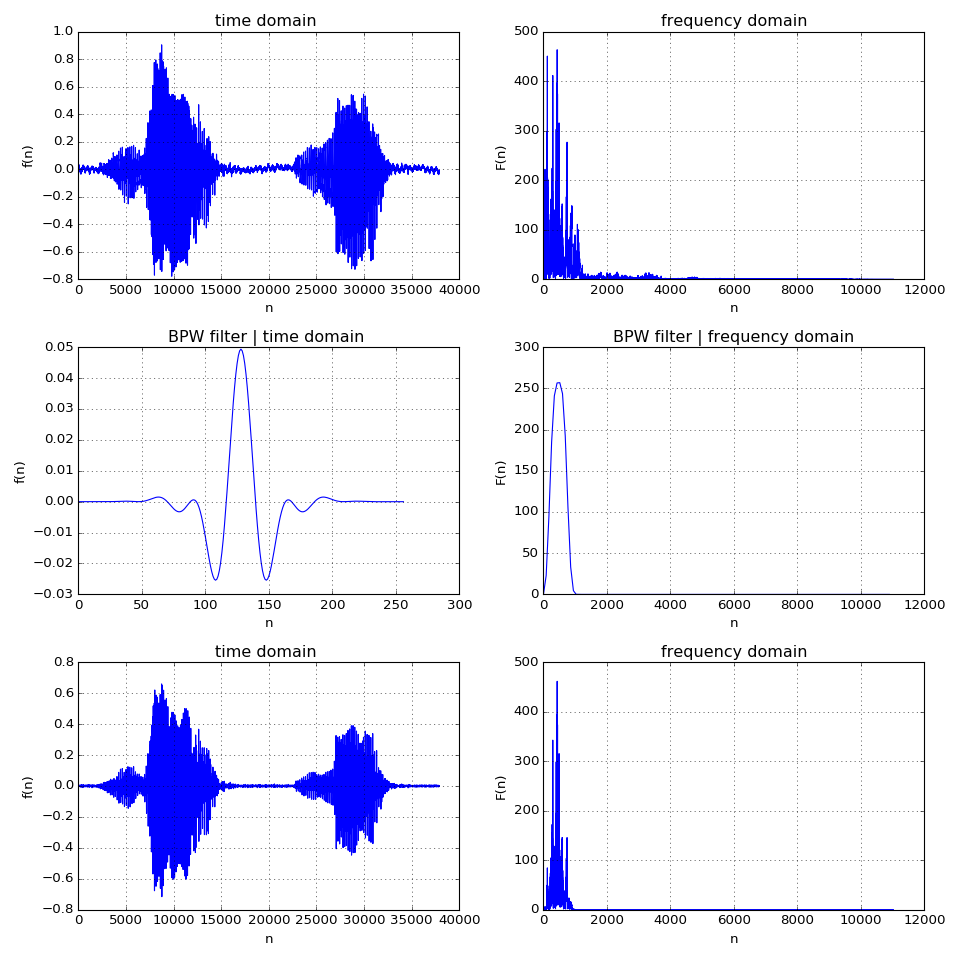

In [6]:
fc1=200
fc2=750
bpw=bpf(fc1,fc2,m,dt)
_,Cn_bpw=fourierTransform(bpw)
Cn_bpw=Cn_bpw[:NF/2]*(NF+1)

yn_bpw=np.convolve(data,bpw)[m:-m]

_,Yn_bpw=fourierTransform(yn_bpw)[:NS/2]
Yn_bpw=Yn_bpw[:NS/2]
plotHelper(data,Cn,bpw,Cn_bpw,yn_bpw,Yn_bpw,dt,"BPW filter")

sf.write('output/bpw_roma1.wav',yn_bpw , fs)

<IPython.core.display.Javascript object>


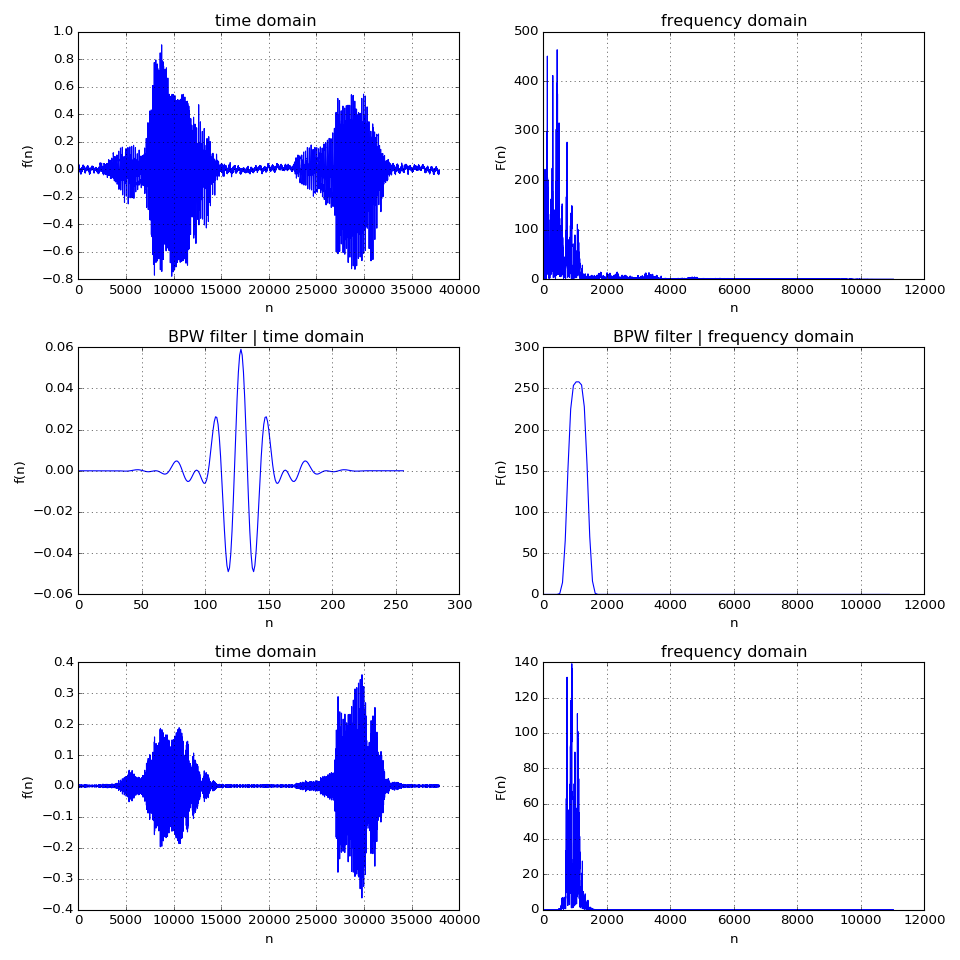

In [7]:
fc1=750
fc2=1400
bpw2=bpf(fc1,fc2,m,dt)
_,Cn_bpw2=fourierTransform(bpw2)
Cn_bpw2=Cn_bpw2[:NF/2]*(NF+1)

yn_bpw2=np.convolve(data,bpw2)[m:-m]

_,Yn_bpw2=fourierTransform(yn_bpw2)[:NS/2]
Yn_bpw2=Yn_bpw2[:NS/2]
plotHelper(data,Cn,bpw2,Cn_bpw2,yn_bpw2,Yn_bpw2,dt,"BPW filter")

sf.write('output/bpw_roma2.wav',yn_bpw2 , fs)

<IPython.core.display.Javascript object>


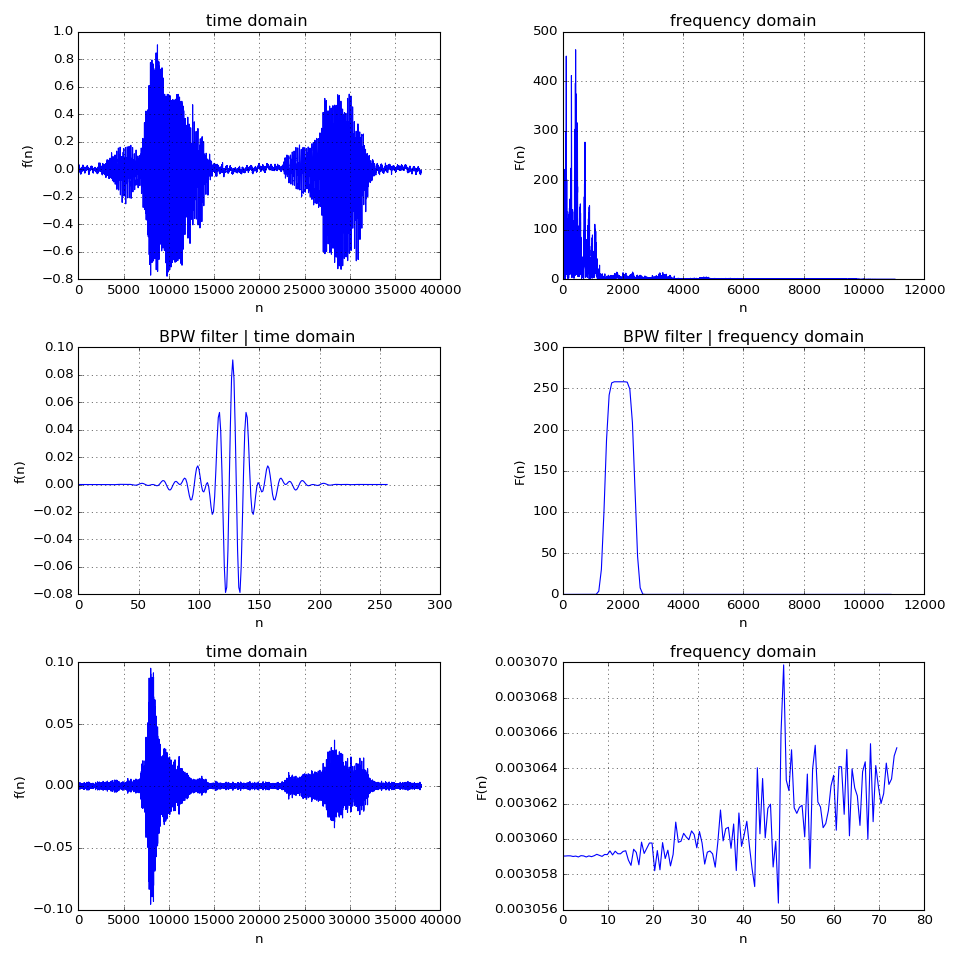

In [8]:
fc1=1400
fc2=2400
bpw3=bpf(fc1,fc2,m,dt)
_,Cn_bpw3=fourierTransform(bpw3)
Cn_bpw3=Cn_bpw3[:NF/2]*(NF+1)

yn_bpw3=np.convolve(data,bpw3)[m:-m]

_,Yn_bpw3=fourierTransform(yn_bpw3)
Yn_bpw3=Yn_bpw3[:NF/2]
plotHelper(data,Cn,bpw3,Cn_bpw3,yn_bpw3,Yn_bpw3,dt,"BPW filter")

sf.write('output/bpw_roma3.wav',yn_bpw3 , fs)

<IPython.core.display.Javascript object>


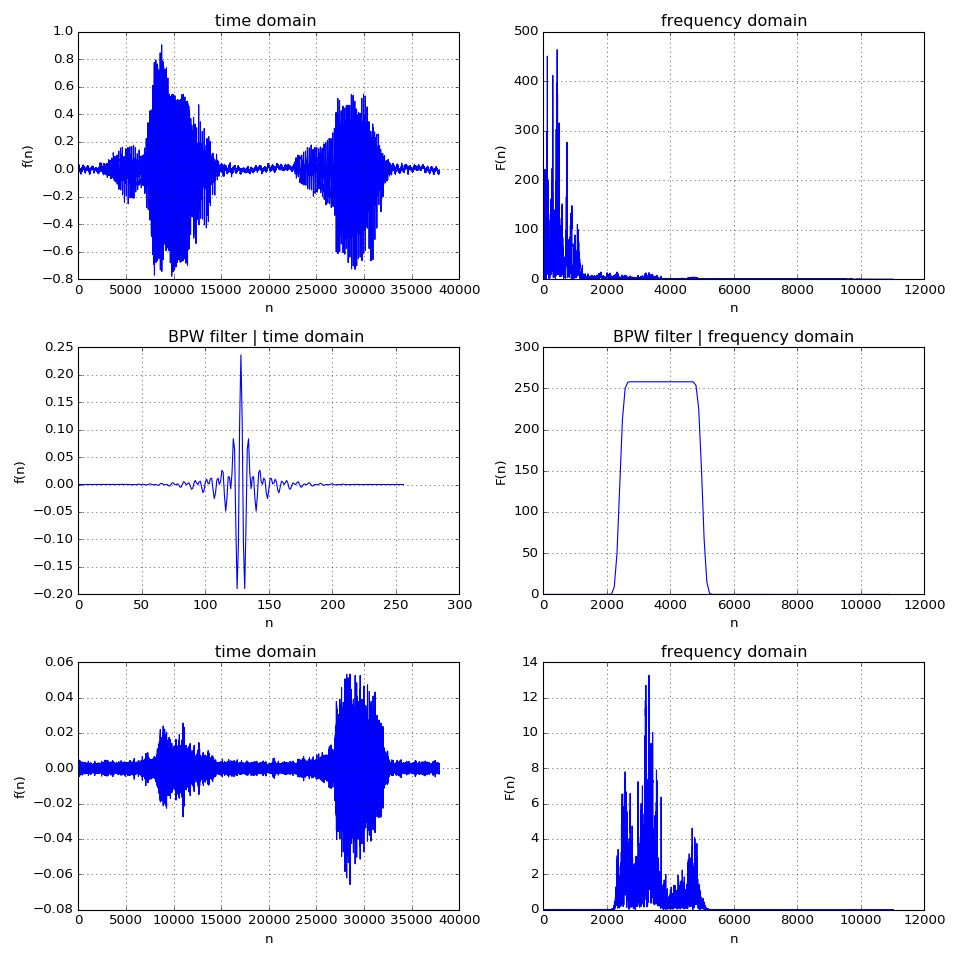

In [9]:
fc1=2400
fc2=5000
bpw4=bpf(fc1,fc2,m,dt)
_,Cn_bpw4=fourierTransform(bpw4)
Cn_bpw4=Cn_bpw4[:NF/2]*(NF+1)

yn_bpw4=np.convolve(data,bpw4)[m:-m]

_,Yn_bpw4=fourierTransform(yn_bpw4)
Yn_bpw4=Yn_bpw4[:NS/2]
plotHelper(data,Cn,bpw4,Cn_bpw4,yn_bpw4,Yn_bpw4,dt,"BPW filter")

sf.write('output/bpw_roma4.wav',yn_bpw4 , fs)